# Анализ данных о задержках и отменах рейсов авиакомпании, анализ времени и причин, и предсказание динамики изменения

__Датасет взят с [Kaggle.com](https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018)__

__Рассмотрим датасет, содержащий данные о задержках и отменах рейсов авиакомпаний за 2009 - 2018 годы.__

In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from collections import Counter
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression

plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df_18 = pd.read_csv(ZipFile('airline-delay-and-cancellation-data-2009-2018.zip').open('2018.csv'), nrows=5)

In [3]:
df_18

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


__Данный датасет содержит следующие колонки:__

In [4]:
columns_names = ['Дата полета, гг / мм / дд',
         'Идентификатор авиакомпании',
         'Номер рейса',
         'Код аэропорта вылета',
         'Код аэропорта назначения',
         'Запланированное время вылета',
         'Фактическое время вылета',
         'Общая задержка вылета в минутах',
         'Разница времени между началом движения в аэропорту вылета и отрывом шасси',
         'Время отрыва шасси от земли',
         'Время касания шасси',
         'Разница времени между касанием шасси и остановкой в аэропорту назначения',
         'Планируемое время прибытия',
         'Фактическое время прибытия',
         'Общая задержка прибытия в минутах',
         'Рейс отменен (1 = отменен)',
         f"""Причина отмены рейса:
                       A - Авиакомпания/Перевозчик;
                       B - Погода;
                       C - Национальная воздушная система;
                       D - Безопасность""",
         'Самолет перенаправлен в другой аэропорт',
         'Запланированное время полета',
         'Фактическое время полета',
         'Разница времени между отрывом шасси и их касанием',
         'Расстояние между двумя аэропортами',
         'Задержка, вызванная авиакомпанией в минутах',
         'Задержка, вызванная погодой',
         'Задержка, вызванная системой воздущного пространства',
         'Задержка, вызванная безопасностью',
         'Задержка, вызванная поздним прибытием самолета',
         'Дополнительная колонка']

for i, itm in enumerate(df_18.columns):
    print(f'{itm:>20} - {columns_names[i]}')

             FL_DATE - Дата полета, гг / мм / дд
          OP_CARRIER - Идентификатор авиакомпании
   OP_CARRIER_FL_NUM - Номер рейса
              ORIGIN - Код аэропорта вылета
                DEST - Код аэропорта назначения
        CRS_DEP_TIME - Запланированное время вылета
            DEP_TIME - Фактическое время вылета
           DEP_DELAY - Общая задержка вылета в минутах
            TAXI_OUT - Разница времени между началом движения в аэропорту вылета и отрывом шасси
          WHEELS_OFF - Время отрыва шасси от земли
           WHEELS_ON - Время касания шасси
             TAXI_IN - Разница времени между касанием шасси и остановкой в аэропорту назначения
        CRS_ARR_TIME - Планируемое время прибытия
            ARR_TIME - Фактическое время прибытия
           ARR_DELAY - Общая задержка прибытия в минутах
           CANCELLED - Рейс отменен (1 = отменен)
   CANCELLATION_CODE - Причина отмены рейса:
                       A - Авиакомпания/Перевозчик;
                       B - П

In [5]:
df_18 = pd.read_csv(ZipFile('airline-delay-and-cancellation-data-2009-2018.zip').open('2018.csv')).fillna(0)

In [6]:
airlines = df_18['OP_CARRIER'].unique()
print(f'Датасет содержит данные {len(airlines)}-ти авиакомпаний:\n{airlines}')

Датасет содержит данные 18-ти авиакомпаний:
['UA' 'AS' '9E' 'B6' 'EV' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'VX' 'WN'
 'YV' 'YX' 'AA' 'DL']


__Построим гистограмму средних задержек самолетов в зависимости от причины для каждой авиакомапании__

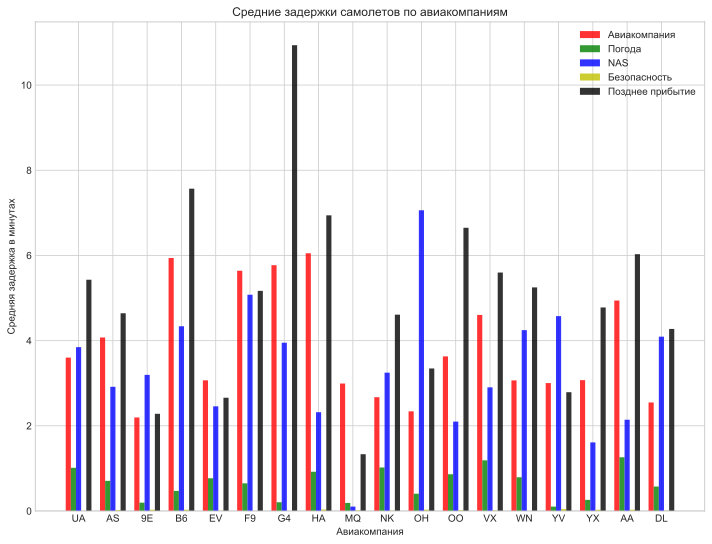

In [7]:
fig, ax = plt.subplots(figsize=(12,9))
index = np.arange(len(airlines))
bar_width = 0.15
opacity = 0.8

bar_1 = plt.bar(index, df_18.groupby('OP_CARRIER')['CARRIER_DELAY'].mean(),
                bar_width, alpha=opacity, color='r', label='Авиакомпания')

bar_2 = plt.bar(index + bar_width, df_18.groupby('OP_CARRIER')['WEATHER_DELAY'].mean(),
                bar_width, alpha=opacity, color='g', label='Погода')

bar_3 = plt.bar(index + 2*bar_width, df_18.groupby('OP_CARRIER')['NAS_DELAY'].mean(),
                bar_width, alpha=opacity, color='b', label='NAS')

bar_4 = plt.bar(index + 3*bar_width, df_18.groupby('OP_CARRIER')['SECURITY_DELAY'].mean(),
                bar_width, alpha=opacity, color='y', label='Безопасность')

bar_5 = plt.bar(index + 4*bar_width, df_18.groupby('OP_CARRIER')['LATE_AIRCRAFT_DELAY'].mean(),
                bar_width, alpha=opacity, color='black', label='Позднее прибытие')

plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка в минутах')
plt.title('Средние задержки самолетов по авиакомпаниям')
plt.xticks(index + 2*bar_width, airlines)
plt.legend();

__Из данной гистограммы можно сделать выводы о пунктуальности авиакомпании, о наиболее часто встречающихся причинах задержек, о значительности этих причин для авиакомпании__

__На гистограмме видно, что основные задержки связаны с особенностями обслуживания самолетов самой авиакомпании и с их поздним прибытием. Для уменьшения задержек, вызванных авиакомпанией, необходимо пересмотреть технологию работы авиакомпании. Для уменьшения задержек, вызванных поздним прибытием самолета, необходимо анализировать причины задержек в аэропортах вылета и прилета.__

__Одним из факторов, влияющим на позднее прибытие, является время руления самолета к месту старта и к месту стоянки. Эта информация позволяет не только выявить причины задержек (а значит и финансовые потери на топливо) для авиакомпании, но и найти слабое место в оптимизации работы аэропорта.__

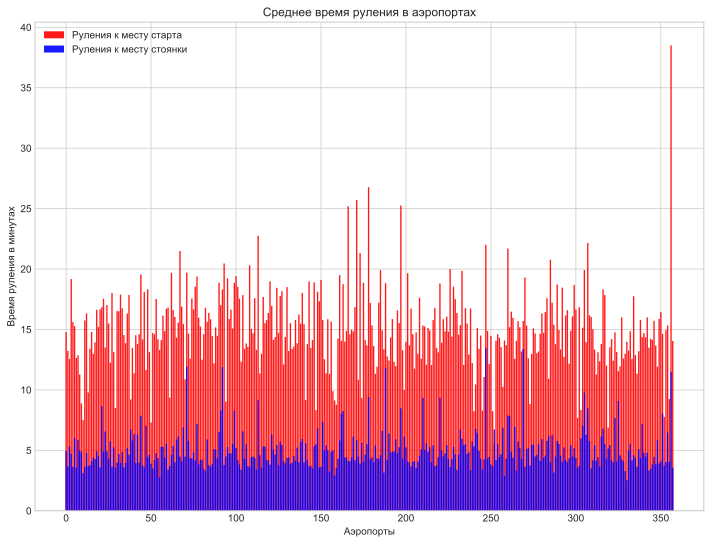

In [8]:
airport_out = df_18['ORIGIN'].unique()
airport_in = df_18['DEST'].unique()
airport_out_mean = df_18.groupby('ORIGIN')['TAXI_OUT'].mean()
airport_in_mean = df_18.groupby('DEST')['TAXI_IN'].mean()

fig, ax = plt.subplots(figsize=(12,9))
index_1 = np.arange(len(airport_out))
index_2 = np.arange(len(airport_in))
bar_width = 0.8
opacity = 0.9

bar_1 = plt.bar(index_1, airport_out_mean, bar_width, alpha=opacity, color='r', label='Руления к месту старта')
bar_2 = plt.bar(index_2, airport_in_mean, bar_width, alpha=opacity, color='b', label='Руления к месту стоянки')

plt.xlabel('Аэропорты')
plt.ylabel('Время руления в минутах')
plt.title('Среднее время руления в аэропортах')
plt.legend();

In [9]:
n = 10

print(f"""{n} аэропортов с самым большим временем руления к месту старта:
{airport_out_mean.sort_values(ascending=False).head(n)}\n""")
print(f"""{n} аэропортов с самым большим временем руления к месту стоянки:
{airport_in_mean.sort_values(ascending=False).head(n)}""")

10 аэропортов с самым большим временем руления к месту старта:
ORIGIN
YNG    38.500000
JFK    26.770473
ISN    25.705370
LGA    25.254967
IFP    25.200000
EWR    22.748921
SFO    22.159483
ORD    21.994591
PHL    21.699973
CIU    21.493314
Name: TAXI_OUT, dtype: float64

10 аэропортов с самым большим временем руления к месту стоянки:
DEST
ORD    13.446072
PPG    13.393443
CLT    11.942304
DFW    11.885237
LAX    11.817331
YNG    11.500000
SEA     9.778137
JFK     9.414623
MIA     9.348691
MCO     9.343455
Name: TAXI_IN, dtype: float64


__Большое время руления говорит о высокой загруженности аэропорта, неспособности обеспечить достаточную проходимость, а для наиболее крупных аэропортов - о большом удалении мест стоянок от взлетно-посадочной полосы__

__Для анализа других данных воспользуемся корреляционным анализом__

In [10]:
df_18.corr()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
OP_CARRIER_FL_NUM,1.000000,0.008714,0.000699,0.008268,0.057340,0.007703,0.002662,-0.022445,0.016117,0.006097,...,-0.316152,-0.306707,-0.324330,-0.341641,0.007912,0.011854,-0.007175,0.000253,0.017102,NaN
CRS_DEP_TIME,0.008714,1.000000,0.898959,0.103486,-0.002665,0.871400,0.589187,-0.050186,0.688942,0.563516,...,-0.018850,-0.024661,-0.020961,-0.012125,0.015302,0.016207,0.026600,0.000666,0.105404,NaN
DEP_TIME,0.000699,0.898959,1.000000,0.141415,0.076396,0.972075,0.691089,0.006796,0.645031,0.665300,...,-0.011827,0.048716,0.039391,-0.005165,0.035668,0.012332,0.053189,0.002940,0.136611,NaN
DEP_DELAY,0.008268,0.103486,0.141415,1.000000,0.059631,0.130074,0.041920,0.012556,0.089314,0.034762,...,0.014023,0.019919,0.011672,0.010227,0.646999,0.313062,0.335952,0.034379,0.616402,NaN
TAXI_OUT,0.057340,-0.002665,0.076396,0.059631,1.000000,0.104559,0.098935,0.055712,0.020541,0.095908,...,0.090761,0.231066,0.096151,0.048497,0.031234,0.053953,0.306042,0.001427,0.039814,NaN
WHEELS_OFF,0.007703,0.871400,0.972075,0.130074,0.104559,1.000000,0.712787,0.011622,0.651873,0.686917,...,-0.018232,0.048619,0.034968,-0.014745,0.032322,0.011591,0.059652,0.002701,0.126571,NaN
WHEELS_ON,0.002662,0.589187,0.691089,0.041920,0.098935,0.712787,1.000000,0.049443,0.794011,0.970564,...,0.023630,0.093579,0.078845,0.020893,0.000227,-0.000522,0.044465,0.001169,0.037290,NaN
TAXI_IN,-0.022445,-0.050186,0.006796,0.012556,0.055712,0.011622,0.049443,1.000000,-0.008815,0.055231,...,0.111043,0.195310,0.111388,0.077832,0.007732,0.010251,0.165116,0.000388,0.016664,NaN
CRS_ARR_TIME,0.016117,0.688942,0.645031,0.089314,0.020541,0.651873,0.794011,-0.008815,1.000000,0.788926,...,0.020055,0.014624,0.013200,0.013563,0.011002,0.014832,0.040265,0.000931,0.086759,NaN
ARR_TIME,0.006097,0.563516,0.665300,0.034762,0.095908,0.686917,0.970564,0.055231,0.788926,1.000000,...,0.020905,0.090597,0.075633,0.017197,-0.001950,-0.001307,0.040919,0.001034,0.030926,NaN


__В корреляционной матрице можно заметить, что значения задержки, вызванной системой воздущного пространства, и временем руления коррелируют, что связано со службой авиадиспетчеров, которая дает разрешение на руление и строит его маршрут; значения дальности полета не коррелируют со временем задержек__

__Однако не все зависимости величин явно выражены. Посмотрим на гистограмму зависимости количества отмен рейсов от планового времени вылета__

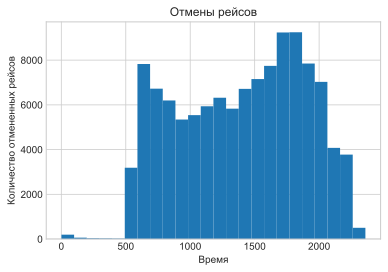

In [11]:
df_18[df_18['CANCELLED']!=0]['CRS_DEP_TIME'].hist(bins=24)
plt.xlabel('Время')
plt.ylabel('Количество отмененных рейсов')
plt.title('Отмены рейсов');

__Отменяют чаще рейсы запланированные на раннее утро и вечер, что скорее всего связано с бОльшим количеством рейсов в это время, а практически полное отсутствие отмен в ночное время связано с тем, что многие аэропорты закрыты на вылет ночью.__

__Проведем анализ времени задержек__

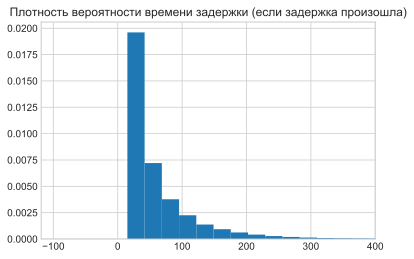

Минимальной задержкой считается 15 минут


In [12]:
df_sum = df_18[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1)
df_sum[df_sum!=0].hist(bins=100, density=True);
plt.xlim(right=400)
plt.title('Плотность вероятности времени задержки (если задержка произошла)')
df_min = df_sum[df_sum!=0].min()
df_mean = df_sum.mean()
plt.show()
print(f'Минимальной задержкой считается {int(df_min)} минут')

__Поскольку минимальная фиксируемая задержка - 15 минут, то дополним данные временем предпосылки к задержке.__

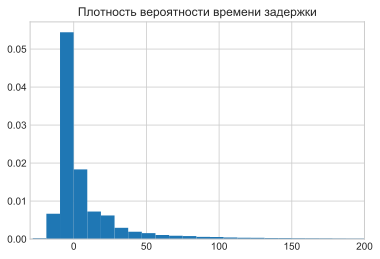

Оценочное среднее время задержки = 10.709876527806543


In [13]:
df_sum[df_sum==0] = df_18['DEP_DELAY']
df_sum.hist(bins=300, density=True);
plt.xlim(left=-30, right=200)
plt.title('Плотность вероятности времени задержки')
df_mean = df_sum.mean()
plt.show()
print(f'Оценочное среднее время задержки = {df_mean}')

__Проверим распределение времени задержки по критерию Колмогорова-Смирнова на нормальность__

In [14]:
alpha = 0.05

print(stats.ksone.ppf(1 - alpha, n=len(df_sum)))
print(stats.kstest(rvs=df_sum, cdf=stats.norm(loc=df_mean, scale=df_sum.std(ddof=1)).cdf, alternative='greater'))

0.000455662289324432
KstestResult(statistic=0.2642506565155442, pvalue=0.0)


__Значение критерия Колмогорова-Смирнова больше критического значение, следовательно гипотеза о нормальности распределения времени задержки отвергнута__

__Построим линейную регрессию для времени задержки__

In [15]:
X = np.vstack((np.ones((df_18.shape[0])), df_18['DEP_DELAY'], df_18['ARR_DELAY'], df_18['ACTUAL_ELAPSED_TIME'] - df_18['CRS_ELAPSED_TIME'])).T
Y = df_sum.values.reshape(-1, 1)
XTX = X.T.dot(X)
np.linalg.det(XTX)

4.161550159434133e+35

In [16]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(Y)
b

array([[3.22665908],
       [0.58437829],
       [0.39672107],
       [0.02968033]])

__Модель линейной регрессии имеет вид: $y = b_0+b_1x_1+b_2x_2 +b_3x_3$__

__Коэффициент детерминации для текущего года:__

In [17]:
Y_pr = b[0]+df_18['DEP_DELAY']*b[1]+df_18['ARR_DELAY']*b[2]+(df_18['ACTUAL_ELAPSED_TIME'] - df_18['CRS_ELAPSED_TIME'])*b[3]
Y_ts = df_18[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1)
Y_pr[Y_pr<15]=0
(np.corrcoef(Y_pr, Y_ts)**2)[0,1]

0.9731529677401479

__Коэффициент детерминации данной модели для данных 2017 года:__

In [18]:
df_17 = pd.read_csv(ZipFile('airline-delay-and-cancellation-data-2009-2018.zip').open('2017.csv'), nrows=200000).fillna(0)

Y_pr = b[0]+df_17['DEP_DELAY']*b[1]+df_17['ARR_DELAY']*b[2]
Y_ts = df_17[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1)
Y_pr[Y_pr<15]=0
(np.corrcoef(Y_pr, Y_ts)**2)[0,1]

0.9623979915782669

__Поскольку некоторые величины в модели сильно коррелируют между собой, то модель можно упростить, используя данные, известные еще до прилета самолета__

In [19]:
X = np.vstack((np.ones((df_18.shape[0])), df_18['DEP_DELAY'], df_18['CRS_ELAPSED_TIME'])).T
Y = df_sum.values.reshape(-1, 1)

XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(X.T).dot(Y)
print(f'Коэффициенты модели b0 = {b[0,0]}, b1 = {b[1,0]}, b2 = {b[2,0]}')

Y_pr = b[0]+df_18['DEP_DELAY']*b[1]+df_18['CRS_ELAPSED_TIME']*b[2]
Y_ts = df_18[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1)
Y_pr[Y_pr<15]=0
print(f'Коэффициент детерминации для текущего года: {(np.corrcoef(Y_pr, Y_ts)**2)[0,1]}')

Y_pr = b[0]+df_17['DEP_DELAY']*b[1]+df_17['ARR_DELAY']*b[2]
Y_ts = df_17[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1)
Y_pr[Y_pr<15]=0
print(f'Коэффициент детерминации для предыдущего года: {(np.corrcoef(Y_pr, Y_ts)**2)[0,1]}')

Коэффициенты модели b0 = 0.8910289789842548, b1 = 0.9790918677350667, b2 = 0.0015310404628743643
Коэффициент детерминации для текущего года: 0.933872092314942
Коэффициент детерминации для предыдущего года: 0.9087991732741078


__Коэффициент детерминации говорит нам о том, что подавляющее большинство дисперсии времени задержки учитывается данной моделью и мы можем использовать данную модель для предсказания времени задержки.__

__Попробуем предсказать причину задержки. Создадим модели для логистической регрессии для каждой причины.__

In [20]:
X_lr = df_18[['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME']].copy()
Y_lr = df_18[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].copy()
Y_lr[Y_lr!=0]=1

model_carrier = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_lr, Y_lr['CARRIER_DELAY'])
model_weather = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_lr, Y_lr['WEATHER_DELAY'])
model_nas = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_lr, Y_lr['NAS_DELAY'])
model_security = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_lr, Y_lr['SECURITY_DELAY'])
model_late = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_lr, Y_lr['LATE_AIRCRAFT_DELAY'])

Y_pred = np.vstack((model_carrier.predict(X_lr), model_weather.predict(X_lr), model_nas.predict(X_lr), model_security.predict(X_lr), model_late.predict(X_lr))).T
Y_pred

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

__Определим вероятность возникновения каждой причины.__

In [21]:
weight = Y_lr.sum(axis=0)
s_weight = weight.sum()
w_delay = np.array([weight['CARRIER_DELAY']/s_weight, weight['WEATHER_DELAY']/s_weight, weight['NAS_DELAY']/s_weight, weight['SECURITY_DELAY']/s_weight, weight['LATE_AIRCRAFT_DELAY']/s_weight])
w_delay

array([0.30216114, 0.03881332, 0.33794168, 0.00198413, 0.31909973])

In [22]:
Y_res = Y_pred*w_delay
Y_sum = Y_res.sum(axis=1).reshape(-1, 1)
Y_sum[Y_sum==0]=1 # исключение деления на ноль
Y_pred_weight = Y_res/Y_sum

Y_pred_weight[Y_pred_weight.sum(axis=1)!=0]

array([[0.31501286, 0.        , 0.35231524, 0.        , 0.33267189],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.48636757, 0.        , 0.        , 0.        , 0.51363243],
       ...,
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ]])

__Предскажем задержку самолета и распределим ее, с учетом вероятностей, по причинам. Посчитаем коэффициент детерминации.__

In [23]:
Y_pr = b[0]+df_18['DEP_DELAY']*b[1]+df_18['CRS_ELAPSED_TIME']*b[2]
Y_dep = Y_pred_weight*np.array(Y_pr).reshape(-1,1)
corr_cof = (np.corrcoef(Y_dep[:,0], df_18['CARRIER_DELAY'])[0,1], np.corrcoef(Y_dep[:,1], df_18['WEATHER_DELAY'])[0,1], np.corrcoef(Y_dep[:,2], df_18['NAS_DELAY'])[0,1], np.corrcoef(Y_dep[:,3], df_18['SECURITY_DELAY'])[0,1], np.corrcoef(Y_dep[:,4], df_18['LATE_AIRCRAFT_DELAY'])[0,1])
print(f'Коэффициенты корреляции для текущего года: {corr_cof}')

Коэффициенты корреляции для текущего года: (0.600211230555069, 0.3182826984146404, 0.36790495694001685, -1.5126133909651766e-05, 0.5702247989335162)


__Проверим нашу модель на данных 2017 года__

In [24]:
df_17 = pd.read_csv(ZipFile('airline-delay-and-cancellation-data-2009-2018.zip').open('2017.csv')).fillna(0)

X_lr = df_17[['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME']].copy()
Y_pred = np.vstack((model_carrier.predict(X_lr), model_weather.predict(X_lr), model_nas.predict(X_lr), model_security.predict(X_lr), model_late.predict(X_lr))).T

Y_res = Y_pred*w_delay
Y_sum = Y_res.sum(axis=1).reshape(-1, 1)
Y_sum[Y_sum==0]=1 # исключение деления на ноль
Y_pred_weight = Y_res/Y_sum

Y_pr = b[0]+df_17['DEP_DELAY']*b[1]+df_17['CRS_ELAPSED_TIME']*b[2]
Y_dep = Y_pred_weight*np.array(Y_pr).reshape(-1,1)

corr_cof = (np.corrcoef(Y_dep[:,0], df_17['CARRIER_DELAY'])[0,1], np.corrcoef(Y_dep[:,1], df_17['WEATHER_DELAY'])[0,1], np.corrcoef(Y_dep[:,2], df_17['NAS_DELAY'])[0,1], np.corrcoef(Y_dep[:,3], df_17['SECURITY_DELAY'])[0,1], np.corrcoef(Y_dep[:,4], df_17['LATE_AIRCRAFT_DELAY'])[0,1])
print(f'Коэффициенты корреляции для 2017 года: {corr_cof}')

Коэффициенты корреляции для 2017 года: (0.6356854193629015, 0.21464932272510578, 0.36403740724679406, -1.3247539755552857e-05, 0.5507291371428729)


__Судя по коэффициентам корреляции, мы можем предсказывать время задержки самолета на данной модели. Предсказывать причины задержек по данной модели мы можем с меньше точностью, но с учетом того, что, чаще всего, выбирают только одну причину, оказавшую наибольшее влияние на время задержки и все причины имеют различные вероятности возникновения, то данная модель имеет хорошие показатели.__